<a href="https://colab.research.google.com/github/ShwetaAroraKhera/ShwetaAroraKhera/blob/main/KNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Bank_data.csv')

In [ ]:
data.head

<bound method NDFrame.head of       User ID  Gender  Age  Salary  Purchased
0    15624510    Male   19   19000          0
1    15810944    Male   35   20000          0
2    15668575  Female   26   43000          0
3    15603246  Female   27   57000          0
4    15804002    Male   19   76000          0
..        ...     ...  ...     ...        ...
395  15691863  Female   46   41000          1
396  15706071    Male   51   23000          1
397  15654296  Female   50   20000          1
398  15755018    Male   36   33000          0
399  15594041  Female   49   36000          1

[400 rows x 5 columns]>

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'Salary', 'Purchased'], dtype='object')

In [ ]:
gender = {'Male': 1,'Female': 2}

In [ ]:
data.Gender = [gender[item] for item in data.Gender]

In [ ]:
data.Gender

0      1
1      1
2      2
3      2
4      1
      ..
395    2
396    1
397    2
398    1
399    2
Name: Gender, Length: 400, dtype: int64

In [ ]:
x = data.iloc[:, 1:4].values
y = data.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=2, metric="minkowski")

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  4],
       [ 2, 26]])

In [ ]:
(48+26)/(48+2+4+26)

0.925

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
from collections import defaultdict

In [ ]:
defaultdict()

In [ ]:
score = [] 
random_state = []
accuracies = defaultdict(list)

In [ ]:
for seed in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)
    X_train = sc.fit_transform(X_train)
    X_test  = sc.transform(X_test)   
    classifier = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=2, metric="minkowski")
    classifier.fit(X_train, y_train)
    random_state.append(seed)
    y_pred = classifier.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))
    accuracies[seed].append(accuracy_score(y_test, y_pred))
    
   



In [ ]:
for seed in range(100):
    X_test, X_train, y_test, y_train = train_test_split(x, y, train_size=0.70, random_state=seed)
    X_train = sc.fit_transform(X_train)
    X_test  = sc.transform(X_test)   
    classifier = KNeighborsClassifier(n_neighbors=5, weights="uniform", p=2, metric="minkowski")
    classifier.fit(X_train, y_train)
    random_state.append(seed)
    y_pred = classifier.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))
    accuracies[seed].append(accuracy_score(y_test, y_pred))

In [ ]:
accuracies.get(42)

[0.925, 0.8928571428571429]

In [ ]:
RESULT = pd.DataFrame([{'state': k, 'score': v} for k, v in accuracies.items()])
RESULT

,state,score
0,0,[0.83125]
1,1,[0.89375]
2,2,[0.8875]
3,3,[0.8875]
4,4,[0.8125]
...,...,...
95,95,[0.9]
96,96,[0.884375]
97,97,[0.88125]
98,98,[0.871875]


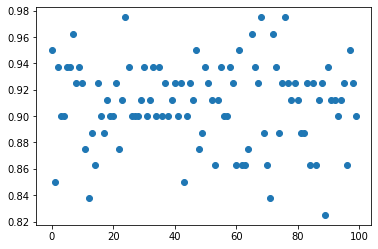

In [ ]:
plt.scatter(random_state, score)
plt.show()
